In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

# For Modeling 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# #For Model Evaluation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



In [2]:
#Importing .csv file and assigning it to the df variable
df = pd.read_csv('df4.csv')

### Preparing DataFrame

In [5]:
#Dropping 
df = df.drop(columns = ['Unnamed: 0'])

<AxesSubplot:>

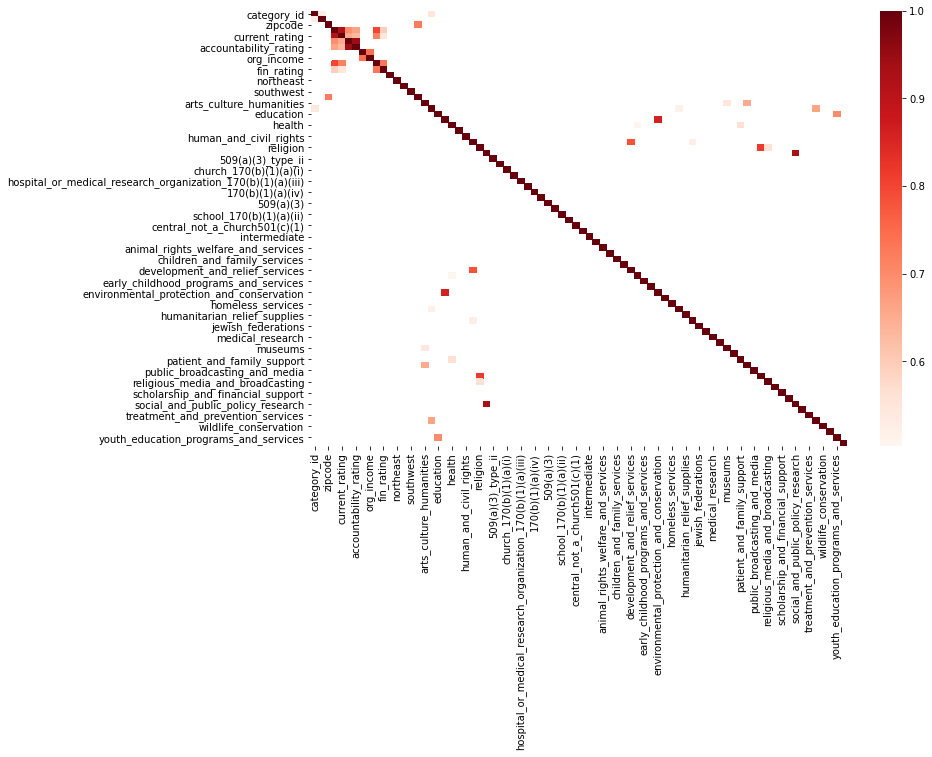

In [6]:
#Looking at features that are highly correlated using a heatmap
corr=df.corr()

kot = corr[corr>=.5]
plt.figure(figsize=(12,8))

sns.heatmap(kot, cmap="Reds")

In [37]:
df_corr = corr >=.05

df_corr['category_id'].value_counts()

False    55
True     23
Name: category_id, dtype: int64

False    66
True     12
Name: current_rating, dtype: int64

In [33]:
df_corr

,category_id,cause_id,zipcode,current_score,current_rating,accountability_score,accountability_rating,org_assets,org_income,fin_score,fin_rating,southeast,northeast,midwest,southwest,west,arts_culture_humanities,community_development,education,environment,health,human_services,human_and_civil_rights,international,religion,research_and_public_policy,509(a)(3)_type_ii,509(a)(3)_type_iii,church_170(b)(1)(a)(i),governmental_unit_170(b)(1)(a)(v),hospital_or_medical_research_organization_170(b)(1)(a)(iii),509(a)(2),170(b)(1)(a)(iv),170(b)(1)(a)(vi),509(a)(3),private_non-operating_foundation,school_170(b)(1)(a)(ii),central_church,central_not_a_church501(c)(1),independent,intermediate,subordinate,animal_rights_welfare_and_services,botanical_gardens_parks_and_nature_centers,children_and_family_services,community_foundations,development_and_relief_services,diseases_disorders_and_disciplines,early_childhood_programs_and_services,education_policy_and_reform,environmental_protection_and_conservation,food_banks_pantries_and_distribution,homeless_services,housing_and_neighborhood_development,humanitarian_relief_supplies,international_peace_security_and_affairs,jewish_federations,libraries_historical_societies_and_landmark_preservation,medical_research,multipurpose_human_service_organizations,museums,non-medical_science_&_technology_research,patient_and_family_support,performing_arts,public_broadcasting_and_media,religious_activities,religious_media_and_broadcasting,rescue_missions,scholarship_and_financial_support,social_services,social_and_public_policy_research,special_education,treatment_and_prevention_services,united_ways,wildlife_conservation,"youth_development,_shelter,_and_crisis_services",youth_education_programs_and_services,zoos_and_aquariums
category_id,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,True,True,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,True,True,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,False,True,False,False,False,False
cause_id,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,True,True,False,True,False,False,False,False,True,True,False,False,True,False,True,True,True,False,True,False,True,False,False,True,True
zipcode,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
current_score,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
current_rating,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,Fals

In [ ]:
#Dropping the following because of high correlation

In [ ]:
# The above heatmap tells me which features are highly correlated. I want to eliminate highly correlated
# features and will remove them. 

# Baseline Model

In [9]:
features = ['current_rating', 'accountability_rating',
              'southeast', 'northeast', 'midwest', 'southwest', 'west', 'arts_culture_humanities','community_development', 'education', 'environment', 'health', 'human_services', 'human_and_civil_rights', 
                'international', 'religion', 'research_and_public_policy', '509(a)(3)_type_ii', '509(a)(3)_type_iii', 'church_170(b)(1)(a)(i)', 'governmental_unit_170(b)(1)(a)(v)', 'hospital_or_medical_research_organization_170(b)(1)(a)(iii)',
               '509(a)(2)', '170(b)(1)(a)(iv)', '170(b)(1)(a)(vi)', '509(a)(3)', 'private_non-operating_foundation', 'school_170(b)(1)(a)(ii)', 'central_church', 'central_not_a_church501(c)(1)',
               'independent', 'intermediate', 'subordinate', 'animal_rights_welfare_and_services', 'botanical_gardens_parks_and_nature_centers', 'children_and_family_services', 'community_foundations',
               'development_and_relief_services', 'diseases_disorders_and_disciplines', 'early_childhood_programs_and_services', 'education_policy_and_reform', 'environmental_protection_and_conservation',
               'food_banks_pantries_and_distribution', 'homeless_services', 'housing_and_neighborhood_development', 'humanitarian_relief_supplies', 'international_peace_security_and_affairs', 
               'jewish_federations', 'libraries_historical_societies_and_landmark_preservation', 'medical_research', 'multipurpose_human_service_organizations', 'museums', 'non-medical_science_&_technology_research',
               'patient_and_family_support', 'performing_arts', 'public_broadcasting_and_media', 'religious_activities', 'religious_media_and_broadcasting', 'rescue_missions', 'scholarship_and_financial_support', 
               'social_services', 'social_and_public_policy_research', 'special_education', 'treatment_and_prevention_services', 'united_ways', 'wildlife_conservation', 'youth_development,_shelter,_and_crisis_services',
               'youth_education_programs_and_services', 'zoos_and_aquariums']

### Logistic Regression

In [10]:
X= df[features]
y= df['fin_rating']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

logreg = LogisticRegression().fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy_score(y_pred, y_test)

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8512014787430684

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(pred, y_test))

0.8368761552680222


/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('feature:%0d, score: %.5f' %(i,v))

feature:0, score: 0.55744
feature:1, score: 0.13198
feature:2, score: 0.01892
feature:3, score: 0.02019
feature:4, score: 0.01677
feature:5, score: 0.01403
feature:6, score: 0.01710
feature:7, score: 0.00539
feature:8, score: 0.00355
feature:9, score: 0.00352
feature:10, score: 0.00268
feature:11, score: 0.00330
feature:12, score: 0.00634
feature:13, score: 0.00684
feature:14, score: 0.00243
feature:15, score: 0.00446
feature:16, score: 0.00272
feature:17, score: 0.00011
feature:18, score: 0.00005
feature:19, score: 0.00464
feature:20, score: 0.00002
feature:21, score: 0.00064
feature:22, score: 0.01804
feature:23, score: 0.00097
feature:24, score: 0.01825
feature:25, score: 0.00246
feature:26, score: 0.00001
feature:27, score: 0.00430
feature:28, score: 0.00005
feature:29, score: 0.00755
feature:30, score: 0.01227
feature:31, score: 0.00146
feature:32, score: 0.00584
feature:33, score: 0.00456
feature:34, score: 0.00245
feature:35, score: 0.00313
feature:36, score: 0.00181
feature:37,

## Decision Tree

In [14]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
y_pred = classifier.predict(X_test)

In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 254  214]
 [ 141 1555]]
              precision    recall  f1-score   support

           0       0.64      0.54      0.59       468
           1       0.88      0.92      0.90      1696

    accuracy                           0.84      2164
   macro avg       0.76      0.73      0.74      2164
weighted avg       0.83      0.84      0.83      2164



## KNN

In [18]:
knn = KNeighborsClassifier(n_neighbors=5, p=2)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
y_pred= knn.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [21]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[ 190  278]
 [ 132 1564]]


In [22]:
print('Original F1 Score:', (f1_score(y_test, y_pred)))
print('Original Accuracy Score:', (accuracy_score(y_test, y_pred)))

Original F1 Score: 0.8841153193894856
Original Accuracy Score: 0.8105360443622921


In [58]:
training = pd.concat([X_train, y_train], axis=1)

In [59]:
low_fin_rating = training[training.fin_rating==0] 
high_fin_rating = training[training.fin_rating==1]

In [64]:
fin_rating_upsampled = resample(high_fin_rating,
                        replace=True,
                        n_samples=len(low_fin_rating),
                        random_state=23)

In [65]:
fin_rating_upsampled.shape

(1958, 70)

In [66]:
df['fin_rating'].value_counts()

1    8392
0    2426
Name: fin_rating, dtype: int64

In [67]:
upsampled = pd.concat([low_fin_rating, fin_rating_upsampled])

upsampled.fin_rating.value_counts()

1    1958
0    1958
Name: fin_rating, dtype: int64

In [68]:
y_train_up = upsampled.fin_rating
X_train_up = upsampled.drop('fin_rating', axis=1)

upsampled_knn = KNeighborsClassifier(n_neighbors=5, p=2)
upsampled_knn.fit(X_train_up, y_train_up)
upsampled_pred = upsampled_knn.predict(X_test)

print('Upsampled F1 Score:', f1_score(y_test, upsampled_pred))
print('Upsampled Accuracy score: ', accuracy_score(y_test, upsampled_pred))

Upsampled F1 Score: 0.7653532126375575
Upsampled Accuracy score:  0.694547134935305
